In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 首先，我们导入所需的库
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
# 然后我们下载所需的股票的历史数据
ticker = "AAPL"  # 这里我们选择苹果公司的股票
df = pdr.get_data_yahoo(ticker, "2022-01-01", "2023-07-01") 
df["Adj Close"] = df["Adj Close"].values.astype(float) 
# 我们将数据分割为训练集和测试集
train = df[df.index < '2023-01-01']  # 训练集是2023年1月1日之前的数据
test = df[df.index >= '2023-01-01']  # 测试集是2023年1月1日及以后的数据
# 在处理神经网络之前，我们需要对数据进行缩放，这里我们选择MinMaxScaler进行缩放
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train["Adj Close"].values.reshape(-1,1))
# 然后我们构建神经网络模型
model = Sequential()  # 使用Sequential模型，这是一个线性堆叠模型
model.add(Dense(units=64, activation='relu', input_dim=1))  # 添加一个隐藏层，有64个神经元，激活函数为relu
model.add(Dense(units=1))  # 添加一个输出层，有1个神经元
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')  # 使用adam优化器，损失函数为均方误差
# 训练模型
model.fit(scaled_data, train["Adj Close"], epochs=50, batch_size=10)
# 最后，我们使用训练好的模型来预测测试集的结果
scaled_test = scaler.transform(test["Adj Close"].values.reshape(-1,1))  # 对测试集进行缩放
test['Predictions'] = model.predict(scaled_test)  # 使用模型进行预测，并将预测结果存储在'Predictions'列

[*********************100%***********************]  1 of 1 completed
Epoch 1/50
26/26 [==============================] - 0s 740us/step - loss: 23758.5059
Epoch 2/50
26/26 [==============================] - 0s 642us/step - loss: 23673.6348
Epoch 3/50
26/26 [==============================] - 0s 599us/step - loss: 23582.5410
Epoch 4/50
26/26 [==============================] - 0s 599us/step - loss: 23471.4746
Epoch 5/50
26/26 [==============================] - 0s 599us/step - loss: 23334.7520
Epoch 6/50
26/26 [==============================] - 0s 562us/step - loss: 23172.9023
Epoch 7/50
26/26 [==============================] - 0s 598us/step - loss: 22983.7617
Epoch 8/50
26/26 [==============================] - 0s 599us/step - loss: 22765.2617
Epoch 9/50
26/26 [==============================] - 0s 599us/step - loss: 22515.0312
Epoch 10/50
26/26 [==============================] - 0s 598us/step - loss: 22235.1562
Epoch 11/50
26/26 [==============================] - 0s 599us/step - loss: 21925

C:\Users\HG\AppData\Local\Temp\ipykernel_27348\2385802548.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = model.predict(scaled_test)  # 使用模型进行预测，并将预测结果存储在'Predictions'列


In [4]:
# 缩放数据
scaler = MinMaxScaler(feature_range=(0,1))
# 对训练数据进行缩放
scaled_train_data = scaler.fit_transform(train["Adj Close"].values.reshape(-1,1))
# 对训练目标进行缩放
scaled_train_target = scaler.transform(train["Adj Close"].values.reshape(-1,1))
# 构建模型
model = Sequential()
# 添加一个隐藏层，包含64个神经元，激活函数为relu，输入维度为1
model.add(Dense(units=64, activation='relu', input_dim=1))
# 添加一个输出层，只有一个神经元，用于预测股价
model.add(Dense(units=1))
# 编译模型，优化器为adam，损失函数为均方误差
model.compile(optimizer='adam', loss='mean_squared_error')
# 训练模型，使用缩放后的训练数据和目标，设置训练轮数为50，批量大小为10
model.fit(scaled_train_data, scaled_train_target, epochs=50, batch_size=10)
# 测试模型
# 对测试数据进行缩放
scaled_test = scaler.transform(test["Adj Close"].values.reshape(-1,1))
# 使用模型对缩放后的测试数据进行预测
test_predictions_scaled = model.predict(scaled_test)
# 对预测结果进行反向缩放，恢复到原始的数值范围
test['Predictions'] = scaler.inverse_transform(test_predictions_scaled)

Epoch 1/50
26/26 [==============================] - 0s 639us/step - loss: 0.2890
Epoch 2/50
26/26 [==============================] - 0s 678us/step - loss: 0.0972
Epoch 3/50
26/26 [==============================] - 0s 659us/step - loss: 0.0288
Epoch 4/50
26/26 [==============================] - 0s 599us/step - loss: 0.0149
Epoch 5/50
26/26 [==============================] - 0s 598us/step - loss: 0.0131
Epoch 6/50
26/26 [==============================] - 0s 639us/step - loss: 0.0118
Epoch 7/50
26/26 [==============================] - 0s 639us/step - loss: 0.0105
Epoch 8/50
26/26 [==============================] - 0s 639us/step - loss: 0.0093
Epoch 9/50
26/26 [==============================] - 0s 619us/step - loss: 0.0082
Epoch 10/50
26/26 [==============================] - 0s 638us/step - loss: 0.0071
Epoch 11/50
26/26 [==============================] - 0s 638us/step - loss: 0.0060
Epoch 12/50
26/26 [==============================] - 0s 639us/step - loss: 0.0051
Epoch 13/50
26/26 [======

C:\Users\HG\AppData\Local\Temp\ipykernel_27348\1548759982.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = scaler.inverse_transform(test_predictions_scaled)


RMSE:  0.44518500729409255


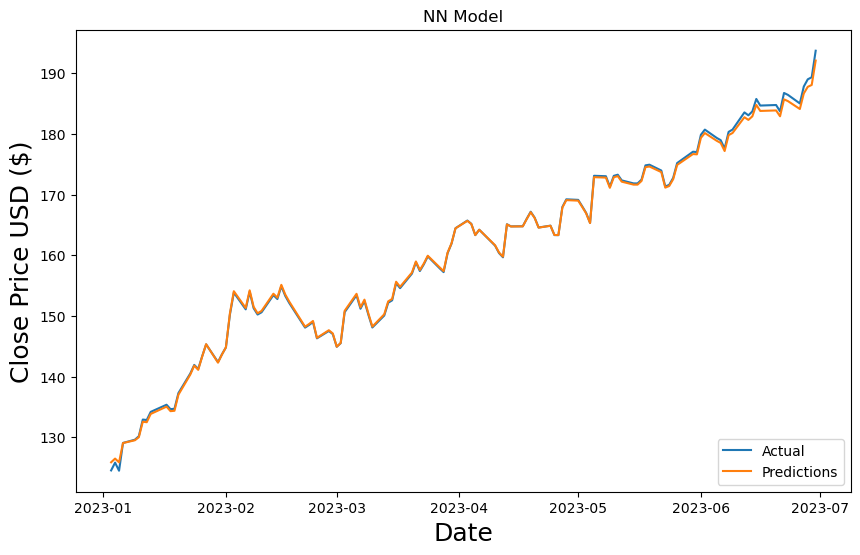

In [5]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test["Adj Close"], test["Predictions"]))
print("RMSE: ", rmse)

# Plot the actual vs predicted prices
plt.figure(figsize=(10,6))
plt.title('NN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test["Adj Close"])
plt.plot(test["Predictions"])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

In [6]:
from keras.layers import LSTM, Dense
# 构建模型
model = Sequential()
model.add(LSTM(units=64, return_sequences=False, input_shape=(1,1)))
model.add(Dense(units=1))
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')
# 训练模型
model.fit(scaled_train_data[:-1].reshape(-1,1,1), scaled_train_data[1:], epochs=50, batch_size=10)
# 测试模型
test['Predictions'] = scaler.inverse_transform(model.predict(scaled_test.reshape(-1,1,1)))

Epoch 1/50
25/25 [==============================] - 1s 935us/step - loss: 0.2627
Epoch 2/50
25/25 [==============================] - 0s 914us/step - loss: 0.1508
Epoch 3/50
25/25 [==============================] - 0s 956us/step - loss: 0.0714
Epoch 4/50
25/25 [==============================] - 0s 914us/step - loss: 0.0303
Epoch 5/50
25/25 [==============================] - 0s 873us/step - loss: 0.0215
Epoch 6/50
25/25 [==============================] - 0s 873us/step - loss: 0.0197
Epoch 7/50
25/25 [==============================] - 0s 914us/step - loss: 0.0182
Epoch 8/50
25/25 [==============================] - 0s 998us/step - loss: 0.0168
Epoch 9/50
25/25 [==============================] - 0s 915us/step - loss: 0.0154
Epoch 10/50
25/25 [==============================] - 0s 956us/step - loss: 0.0141
Epoch 11/50
25/25 [==============================] - 0s 956us/step - loss: 0.0127
Epoch 12/50
25/25 [==============================] - 0s 956us/step - loss: 0.0115
Epoch 13/50
25/25 [======

C:\Users\HG\AppData\Local\Temp\ipykernel_27348\44335198.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = scaler.inverse_transform(model.predict(scaled_test.reshape(-1,1,1)))


RMSE:  0.9448323234619047


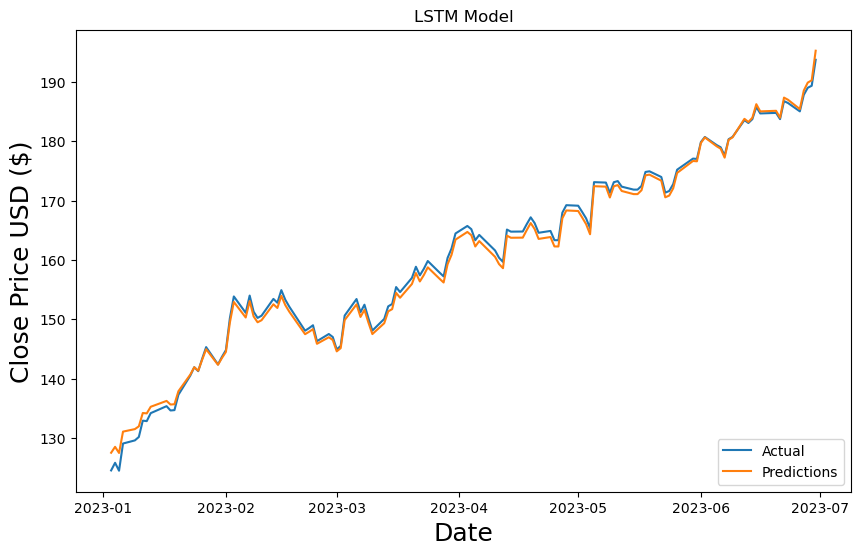

In [7]:
# 计算RMSE
rmse = np.sqrt(mean_squared_error(test["Adj Close"], test['Predictions']))
print("RMSE: ", rmse)
# 绘制实际值和预测值的对比图
plt.figure(figsize=(10,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test["Adj Close"])
plt.plot(test["Predictions"])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()

In [8]:
from keras.layers import Conv1D, MaxPooling1D, Flatten
# 为CNN重塑数据
train_cnn = np.array([np.array(train["Adj Close"].values[i-10:i]) for i in range(10, len(train))])
test_cnn = np.array([np.array(test["Adj Close"].values[i-10:i]) for i in range(10, len(test))])
# 数据缩放
scaler_cnn = MinMaxScaler(feature_range=(0,1))
train_cnn = scaler_cnn.fit_transform(train_cnn)
test_cnn = scaler_cnn.transform(test_cnn)
# 构建CNN模型
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(10,1)))  # 卷积层
model.add(MaxPooling1D(pool_size=2))  # 池化层
model.add(Flatten())  # 展平层
model.add(Dense(50, activation='relu'))  # 全连接层
model.add(Dense(1))  # 输出层
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')
# 训练模型
model.fit(train_cnn, train["Adj Close"].values[10:], epochs=50, batch_size=10)
# 测试模型
predictions = model.predict(test_cnn)
test['Predictions'] = np.append([np.nan]*10, predictions)

Epoch 1/50
25/25 [==============================] - 0s 755us/step - loss: 23337.3066
Epoch 2/50
25/25 [==============================] - 0s 707us/step - loss: 22589.0918
Epoch 3/50
25/25 [==============================] - 0s 748us/step - loss: 20719.0723
Epoch 4/50
25/25 [==============================] - 0s 748us/step - loss: 16851.3418
Epoch 5/50
25/25 [==============================] - 0s 748us/step - loss: 10812.2510
Epoch 6/50
25/25 [==============================] - 0s 706us/step - loss: 4746.6235
Epoch 7/50
25/25 [==============================] - 0s 706us/step - loss: 1756.0619
Epoch 8/50
25/25 [==============================] - 0s 665us/step - loss: 1379.6014
Epoch 9/50
25/25 [==============================] - 0s 705us/step - loss: 1313.1379
Epoch 10/50
25/25 [==============================] - 0s 753us/step - loss: 1256.6464
Epoch 11/50
25/25 [==============================] - 0s 748us/step - loss: 1201.0356
Epoch 12/50
25/25 [==============================] - 0s 748us/step - 

C:\Users\HG\AppData\Local\Temp\ipykernel_27348\3018642145.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = np.append([np.nan]*10, predictions)


RMSE:  4.7341805026566774


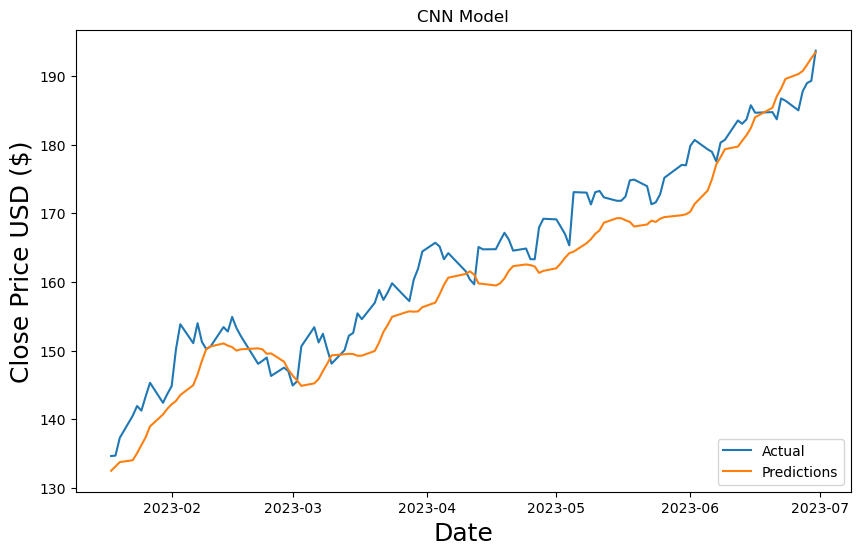

In [9]:
# 删除含有NaN值的数据
test = test.dropna()
# 计算RMSE
rmse = np.sqrt(mean_squared_error(test["Adj Close"], test['Predictions']))
print("RMSE: ", rmse)
# 绘制实际值和预测值的对比图
plt.figure(figsize=(10,6))
plt.title('CNN Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(test["Adj Close"])
plt.plot(test["Predictions"])
plt.legend(['Actual', 'Predictions'], loc='lower right')
plt.show()